In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta

# import all libraries and dependencies for data visualization
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 
sns.set(style='darkgrid')
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker

# import all libraries and dependencies for machine learning
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
# from sklearn.base import TransformerMixintest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [86]:
file = 'train_data.csv'

In [87]:
df=pd.read_csv(file)

In [88]:
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0000,NaN,1.7500
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0000,NaN,12.5000
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0000,8.61 Lakh,4.5000
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0000,NaN,6.0000
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0000,NaN,17.7400
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3494,Hyundai Verna 1.6 SX,Hyderabad,2012,83678,Diesel,Manual,First,22.32 kmpl,1582 CC,126.32 bhp,5.0000,NaN,5.5000
3495,Maruti Wagon R LXI BS IV,Pune,2010,91000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0000,NaN,2.3000
3496,Maruti Ertiga SHVS ZDI Plus,Jaipur,2016,50000,Diesel,Manual,First,24.52 kmpl,1248 CC,88.5 bhp,7.0000,NaN,8.7000
3497,Hyundai Xcent 1.1 CRDi S Option,Delhi,2015,58000,Diesel,Manual,First,24.4 kmpl,1120 CC,71.01 bhp,5.0000,NaN,4.9500


In [89]:
df.shape

(3499, 13)

In [90]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3499 entries, 0 to 3498
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               3499 non-null   object 
 1   Location           3499 non-null   object 
 2   Year               3499 non-null   int64  
 3   Kilometers_Driven  3499 non-null   int64  
 4   Fuel_Type          3499 non-null   object 
 5   Transmission       3499 non-null   object 
 6   Owner_Type         3499 non-null   object 
 7   Mileage            3499 non-null   object 
 8   Engine             3477 non-null   object 
 9   Power              3477 non-null   object 
 10  Seats              3474 non-null   float64
 11  New_Price          481 non-null    object 
 12  Price              3499 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 355.5+ KB


In [91]:
df['Mileage'] = df['Mileage'].apply(lambda x: str(x).replace('kmpl', '').replace('km/kg', '')).astype(float)



df['Engine'] = df['Engine'].apply(lambda x: str(x).replace('CC', '')).astype(float)

df['Power'] = df['Power'].apply(lambda x: str(x).replace('bhp', '').replace('null ', '0')).astype(float)

df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6000,998.0000,58.1600,5.0000,NaN,1.7500
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.6700,1582.0000,126.2000,5.0000,NaN,12.5000
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2000,1199.0000,88.7000,5.0000,8.61 Lakh,4.5000
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.7700,1248.0000,88.7600,7.0000,NaN,6.0000
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2000,1968.0000,140.8000,5.0000,NaN,17.7400
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3494,Hyundai Verna 1.6 SX,Hyderabad,2012,83678,Diesel,Manual,First,22.3200,1582.0000,126.3200,5.0000,NaN,5.5000
3495,Maruti Wagon R LXI BS IV,Pune,2010,91000,Petrol,Manual,First,18.9000,998.0000,67.1000,5.0000,NaN,2.3000
3496,Maruti Ertiga SHVS ZDI Plus,Jaipur,2016,50000,Diesel,Manual,First,24.5200,1248.0000,88.5000,7.0000,NaN,8.7000
3497,Hyundai Xcent 1.1 CRDi S Option,Delhi,2015,58000,Diesel,Manual,First,24.4000,1120.0000,71.0100,5.0000,NaN,4.9500


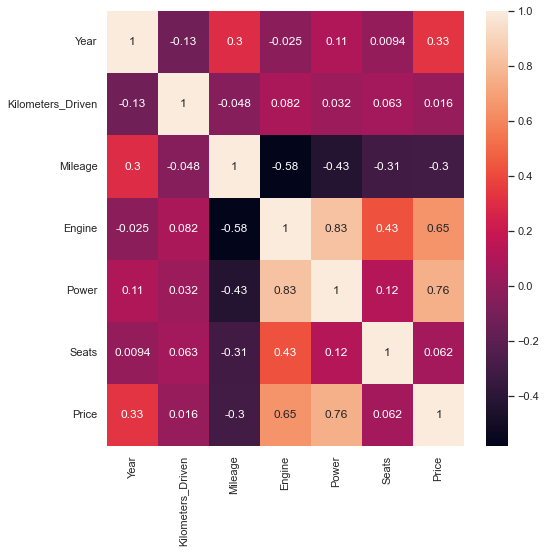

In [92]:
sns.heatmap(df.corr(), annot = True)
plt.show()

In [93]:
# sns.heatmap(df1.corr(), annot = True)
# plt.show()

In [94]:
df=df.drop(["Location"], axis='columns')

In [95]:
df

,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,2010,72000,CNG,Manual,First,26.6000,998.0000,58.1600,5.0000,NaN,1.7500
1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,Diesel,Manual,First,19.6700,1582.0000,126.2000,5.0000,NaN,12.5000
2,Honda Jazz V,2011,46000,Petrol,Manual,First,18.2000,1199.0000,88.7000,5.0000,8.61 Lakh,4.5000
3,Maruti Ertiga VDI,2012,87000,Diesel,Manual,First,20.7700,1248.0000,88.7600,7.0000,NaN,6.0000
4,Audi A4 New 2.0 TDI Multitronic,2013,40670,Diesel,Automatic,Second,15.2000,1968.0000,140.8000,5.0000,NaN,17.7400
...,...,...,...,...,...,...,...,...,...,...,...,...
3494,Hyundai Verna 1.6 SX,2012,83678,Diesel,Manual,First,22.3200,1582.0000,126.3200,5.0000,NaN,5.5000
3495,Maruti Wagon R LXI BS IV,2010,91000,Petrol,Manual,First,18.9000,998.0000,67.1000,5.0000,NaN,2.3000
3496,Maruti Ertiga SHVS ZDI Plus,2016,50000,Diesel,Manual,First,24.5200,1248.0000,88.5000,7.0000,NaN,8.7000
3497,Hyundai Xcent 1.1 CRDi S Option,2015,58000,Diesel,Manual,First,24.4000,1120.0000,71.0100,5.0000,NaN,4.9500


In [96]:
df.isna()

,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
3494,False,False,False,False,False,False,False,False,False,False,True,False
3495,False,False,False,False,False,False,False,False,False,False,True,False
3496,False,False,False,False,False,False,False,False,False,False,True,False
3497,False,False,False,False,False,False,False,False,False,False,True,False


In [131]:
df=df.drop("New_Price", axis=1)

In [132]:

df.isnull()

,Name,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Diesel,LPG,Petrol,Manual,Fourth & Above,Second,Third
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3494,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3495,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3496,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3497,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [133]:
df.dtypes

Name                 object 
Year                 float64
Kilometers_Driven    float64
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
Diesel               uint8  
LPG                  uint8  
Petrol               uint8  
Manual               uint8  
Fourth & Above       uint8  
Second               uint8  
Third                uint8  
dtype: object

In [134]:

#value ranges from 5 to 15 L..

In [135]:
# Segregation of Numerical and Categorical Variables/Columns

cat_col = df.select_dtypes(include=['object']).columns
num_col = df.select_dtypes(exclude=['object']).columns
df_cat = df[cat_col]
df_num = df[num_col]

<AxesSubplot:title={'center':'Car Price Distribution Plot'}, xlabel='Price', ylabel='Density'>

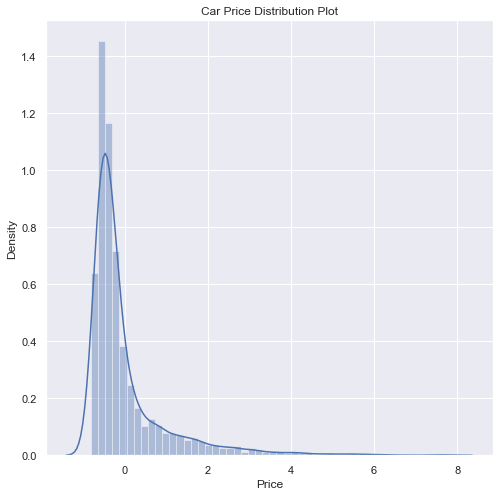

In [136]:
# # Visualizing the different car names available

# plt.rcParams['figure.figsize'] = [15,8]
# ax=df['Name'].value_counts().plot(kind='bar',stacked=True, colormap = 'Set1')
# # ax.set_text('CarName')
# plt.xlabel("Names of the Car",fontweight = 'bold')
# plt.ylabel("Count of Cars",fontweight = 'bold')

plt.figure(figsize=(8,8))

plt.title('Car Price Distribution Plot')
sns.distplot(df['Price'])

In [137]:
# plt.figure(figsize=(20, 15))
# plt.subplot(3,3,1)
# sns.boxplot(x = 'Transmission', y = 'Price', data = df)
# plt.subplot(3,3,2)
# sns.boxplot(x = 'Fuel_Type', y = 'Price', data = df)
# plt.subplot(3,3,3)
# sns.boxplot(x = 'Owner_Type', y = 'Price', data = df)


# plt.show()

In [138]:
scaler = preprocessing.StandardScaler()

df_num  = scaler.fit_transform(df_num )
df

,Name,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Diesel,LPG,Petrol,Manual,Fourth & Above,Second,Third
0,Maruti Wagon R LXI CNG,-1.0468,0.1052,1.8522,-1.0518,-0.6614,-0.0883,-0.6983,0,0,0,1,0,0,0
1,Hyundai Creta 1.6 CRDi SX Option,0.5045,-0.1619,0.3450,-0.0616,0.1036,-0.0883,0.2573,1,0,0,1,0,0,0
2,Honda Jazz V,-0.7365,-0.1189,0.0253,-0.7110,-0.3181,-0.0883,-0.4539,0,0,1,1,0,0,0
3,Maruti Ertiga VDI,-0.4262,0.2344,0.5843,-0.6279,-0.3174,-0.0644,-0.3205,1,0,0,1,0,0,0
4,Audi A4 New 2.0 TDI Multitronic,-0.1160,-0.1648,-0.6271,0.5929,0.2678,-0.0883,0.7232,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3494,Hyundai Verna 1.6 SX,-0.4262,0.2058,0.9214,-0.0616,0.1049,-0.0883,-0.3650,1,0,0,1,0,0,0
3495,Maruti Wagon R LXI BS IV,-1.0468,0.2689,0.1776,-1.0518,-0.5609,-0.0883,-0.6494,0,0,1,1,0,0,0
3496,Maruti Ertiga SHVS ZDI Plus,0.8148,-0.0844,1.3998,-0.6279,-0.3203,-0.0644,-0.0805,1,0,0,1,0,0,0
3497,Hyundai Xcent 1.1 CRDi S Option,0.5045,-0.0155,1.3737,-0.8449,-0.5170,-0.0883,-0.4139,1,0,0,1,0,0,0


In [139]:
# sig_cat_col = ['Name', 'Fuel_Type','Transmission','Owner_Type']

In [140]:
# df1=df
# df1

In [141]:
# dummies = pd.get_dummies(df1[sig_cat_col])
# dummies.shape

In [142]:
# dummies = pd.get_dummies(df1[sig_cat_col], drop_first = True)
# dummies.shape

In [143]:
# df1 = pd.concat([df1, dummies], axis = 1)

In [144]:
# df1.drop( sig_cat_col, axis = 1, inplace = True)
# df1.shape

In [146]:
# df=df.drop("New_Price", axis=1)
# df=df.drop("P[rice", axis=1)
# df

# Defining the map function
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the cars_lr

df = dummies('Fuel_Type',df)
df = dummies('Transmission',df)
df = dummies('Owner_Type',df)

In [147]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(999, inplace=True)

In [148]:
# scaler = preprocessing.StandardScaler()
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_vars = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power','Seats','Price']

df[num_vars] = scaler.fit_transform(df[num_vars])

In [149]:
np.random.seed(0)

In [150]:

# df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)

In [151]:
X = df.drop("Price", axis=1)
y = df["Price"]




In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=2)

In [153]:
X_train.head()

,Name,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Diesel,LPG,Petrol,Manual,Fourth & Above,Second,Third
829,Toyota Etios Liva G,-0.4262,-0.2601,0.0471,-0.7143,-1.3154,-0.0883,0,0,1,1,0,0,0
2535,Maruti Swift Dzire Vdi BSIV,0.8148,0.0793,0.2646,-0.6279,-0.4845,-0.0883,1,0,0,1,0,0,0
1708,Audi Q3 35 TDI Quattro Premium Plus,0.8148,-0.0098,-0.6337,0.5929,0.7198,-0.0883,1,0,0,0,0,0,0
1589,Mahindra Bolero ZLX,-0.1160,0.0276,-0.4619,1.5339,-0.6171,-0.0644,1,0,0,1,0,0,0
1536,Volkswagen Vento Diesel Highline,-0.7365,-0.0844,0.5342,-0.0344,-0.1505,-0.0883,1,0,0,1,0,0,0


In [154]:
# # Apply scaler() to all the columns except the 'dummy' variables
# import warnings
# warnings.filterwarnings("ignore")

# df_train[sig_num_col] = scaler.fit_transform(df_train[sig_num_col])

In [155]:
X_train.head()

,Name,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Diesel,LPG,Petrol,Manual,Fourth & Above,Second,Third
829,Toyota Etios Liva G,-0.4262,-0.2601,0.0471,-0.7143,-1.3154,-0.0883,0,0,1,1,0,0,0
2535,Maruti Swift Dzire Vdi BSIV,0.8148,0.0793,0.2646,-0.6279,-0.4845,-0.0883,1,0,0,1,0,0,0
1708,Audi Q3 35 TDI Quattro Premium Plus,0.8148,-0.0098,-0.6337,0.5929,0.7198,-0.0883,1,0,0,0,0,0,0
1589,Mahindra Bolero ZLX,-0.1160,0.0276,-0.4619,1.5339,-0.6171,-0.0644,1,0,0,1,0,0,0
1536,Volkswagen Vento Diesel Highline,-0.7365,-0.0844,0.5342,-0.0344,-0.1505,-0.0883,1,0,0,1,0,0,0


In [156]:
# y_train = df_train.pop('Price')
# X_train = df_train

In [157]:
# X_train = X_train[['Year', 'Engine', 'Power']]

In [158]:
# X_train.dropna()

In [159]:
X_train[X_train.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)] 

,Name,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Diesel,LPG,Petrol,Manual,Fourth & Above,Second,Third
829,Toyota Etios Liva G,-0.4262,-0.2601,0.0471,-0.7143,-1.3154,-0.0883,0,0,1,1,0,0,0
2535,Maruti Swift Dzire Vdi BSIV,0.8148,0.0793,0.2646,-0.6279,-0.4845,-0.0883,1,0,0,1,0,0,0
1708,Audi Q3 35 TDI Quattro Premium Plus,0.8148,-0.0098,-0.6337,0.5929,0.7198,-0.0883,1,0,0,0,0,0,0
1589,Mahindra Bolero ZLX,-0.1160,0.0276,-0.4619,1.5339,-0.6171,-0.0644,1,0,0,1,0,0,0
1536,Volkswagen Vento Diesel Highline,-0.7365,-0.0844,0.5342,-0.0344,-0.1505,-0.0883,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2347,Ford Ecosport 1.5 DV5 MT Trend,-0.1160,-0.2050,1.0040,-0.2040,-0.3052,-0.0883,1,0,0,1,0,1,0
1608,Maruti Wagon R AMT VXI,0.8148,0.0761,0.5277,-1.0518,-0.5620,-0.0883,0,0,1,0,0,0,0
2541,Mercedes-Benz E-Class 2015-2017 E350 CDI Avantgrade,1.4353,-0.3291,-1.1056,2.3206,1.6643,-0.0883,1,0,0,0,0,0,0
2575,Chevrolet Tavera LS B3 10 Seats BSIII,0.5045,0.5187,-0.7141,1.4932,-0.4159,-0.0286,1,0,0,1,0,0,0


In [160]:
# # Add a constant
# X_train_3c = sm.add_constant(X_train)

# # Create a third fitted model
# lr_3 = sm.OLS(y_train, X_train_3c).fit()
X_train=X_train.drop("Name", axis='columns')
X_test=X_test.drop("Name", axis="columns")

In [161]:

X_test


,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Diesel,LPG,Petrol,Manual,Fourth & Above,Second,Third
122,1.4353,-0.4269,0.8518,-0.0616,0.1036,-0.0883,1,0,0,1,0,0,0
188,-0.4262,0.0190,0.9214,-0.0616,0.1049,-0.0883,1,0,0,1,0,0,0
505,-1.0468,0.2258,-0.0617,-0.6279,-0.4721,-0.0883,1,0,0,1,0,1,0
984,-0.4262,0.0125,0.9562,0.6387,0.8210,-0.0883,1,0,0,0,0,0,0
2984,0.8148,-0.4118,0.0906,-0.7143,-0.3507,-0.0883,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2039,-1.0468,0.0931,0.4951,-0.7143,-0.4282,-0.0883,0,0,1,1,0,0,0
857,0.5045,0.1137,0.9214,-0.0616,0.1049,-0.0883,1,0,0,1,0,0,0
511,-1.3570,0.1760,-0.0356,-0.9025,-0.6171,-0.0883,0,0,1,1,0,0,0
928,-0.7365,-0.1060,-0.1269,-0.7126,-0.4721,-0.0883,0,0,1,1,0,0,0


In [162]:

X_train

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Diesel,LPG,Petrol,Manual,Fourth & Above,Second,Third
829,-0.4262,-0.2601,0.0471,-0.7143,-1.3154,-0.0883,0,0,1,1,0,0,0
2535,0.8148,0.0793,0.2646,-0.6279,-0.4845,-0.0883,1,0,0,1,0,0,0
1708,0.8148,-0.0098,-0.6337,0.5929,0.7198,-0.0883,1,0,0,0,0,0,0
1589,-0.1160,0.0276,-0.4619,1.5339,-0.6171,-0.0644,1,0,0,1,0,0,0
1536,-0.7365,-0.0844,0.5342,-0.0344,-0.1505,-0.0883,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2347,-0.1160,-0.2050,1.0040,-0.2040,-0.3052,-0.0883,1,0,0,1,0,1,0
1608,0.8148,0.0761,0.5277,-1.0518,-0.5620,-0.0883,0,0,1,0,0,0,0
2541,1.4353,-0.3291,-1.1056,2.3206,1.6643,-0.0883,1,0,0,0,0,0,0
2575,0.5045,0.5187,-0.7141,1.4932,-0.4159,-0.0286,1,0,0,1,0,0,0


In [163]:
y_test

122    0.1195 
188    -0.4450
505    -0.5339
984    0.7018 
2984   -0.5294
         ...  
2039   -0.6050
857    -0.2218
511    -0.6494
928    -0.6503
3091   -0.6450
Name: Price, Length: 700, dtype: float64

In [164]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [165]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_model.score(X_test, y_test)
y_pred=xgb_model.predict(X_test)
# y_test['predictions'] = xgb_model.predict(X_test)
# y_test.to_csv('submission.csv')
# preds=xgb_model.predict(X_test)
# accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
# print("accuracy: %f" % (accuracy))

In [166]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
regr = AdaBoostRegressor(random_state=20, n_estimators=100)
regr.fit(X_train, y_train)
regr.score(X_test, y_test)

0.5891774805175082

In [167]:
# save the model to disk
import pickle
filename = 'part1_model.sav'
pickle.dump(xgb_model, open(filename, 'wb'))

In [196]:
data1=pd.read_csv(r'test_data.csv')

In [197]:
data1[data1.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)] 

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
1,BMW 5 Series 520d Luxury Line,Delhi,2013,65000,Diesel,Automatic,First,22.48 kmpl,1995 CC,190 bhp,5.0000,67.87 Lakh
2,Toyota Corolla Altis 1.8 G,Bangalore,2016,16471,Petrol,Manual,Second,14.28 kmpl,1798 CC,138.03 bhp,5.0000,20.48 Lakh
15,Honda City i-VTEC CVT VX,Pune,2018,4500,Petrol,Automatic,First,18.0 kmpl,1497 CC,117.3 bhp,5.0000,15.17 Lakh
19,Renault Duster 110PS Diesel RxZ AMT,Coimbatore,2017,42646,Diesel,Automatic,First,19.6 kmpl,1461 CC,108.45 bhp,5.0000,15.05 Lakh
25,Maruti Swift VDI,Jaipur,2015,63310,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0000,8.13 Lakh
...,...,...,...,...,...,...,...,...,...,...,...,...
2500,Tata Bolt Revotron XT,Chennai,2016,10000,Petrol,Manual,First,17.57 kmpl,1193 CC,88.7 bhp,5.0000,7.77 Lakh
2503,Volkswagen Vento 1.6 Highline,Mumbai,2011,38000,Petrol,Manual,First,16.09 kmpl,1598 CC,103.5 bhp,5.0000,11.91 Lakh
2506,Maruti Vitara Brezza VDi,Pune,2016,37208,Diesel,Manual,First,24.3 kmpl,1248 CC,88.5 bhp,5.0000,9.93 Lakh
2511,Honda Brio 1.2 VX MT,Delhi,2013,33746,Petrol,Manual,First,18.5 kmpl,1198 CC,86.8 bhp,5.0000,6.63 Lakh


In [198]:
data1['Mileage'] = data1['Mileage'].apply(lambda x: str(x).replace('kmpl', '').replace('km/kg', '')).astype(float)



data1['Engine'] = data1['Engine'].apply(lambda x: str(x).replace('CC', '')).astype(float)

data1['Power'] = data1['Power'].apply(lambda x: str(x).replace('bhp', '').replace('null ', '0')).astype(float)

data1

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Mahindra XUV500 W6 2WD,Kochi,2017,41290,Diesel,Manual,Second,16.0000,2179.0000,140.0000,7.0000,NaN
1,BMW 5 Series 520d Luxury Line,Delhi,2013,65000,Diesel,Automatic,First,22.4800,1995.0000,190.0000,5.0000,67.87 Lakh
2,Toyota Corolla Altis 1.8 G,Bangalore,2016,16471,Petrol,Manual,Second,14.2800,1798.0000,138.0300,5.0000,20.48 Lakh
3,Hyundai i20 Asta 1.4 CRDi,Pune,2015,54339,Diesel,Manual,Second,22.5400,1396.0000,88.7300,5.0000,NaN
4,Mahindra KUV 100 mFALCON G80 K2,Hyderabad,2016,24025,Petrol,Manual,First,18.1500,1198.0000,82.0000,6.0000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2517,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0000,2498.0000,112.0000,8.0000,NaN
2518,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9000,998.0000,67.1000,5.0000,NaN
2519,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.4400,936.0000,57.6000,5.0000,NaN
2520,Maruti Wagon R LXI CNG,Kochi,2014,68365,CNG,Manual,First,26.6000,998.0000,58.1600,5.0000,NaN


In [199]:
# scaler = preprocessing.StandardScaler()
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_vars = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power','Seats']

data1[num_vars] = scaler.fit_transform(data1[num_vars])

In [200]:
# Loading the model 
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_train, y_train)
print("Train Accuracy : ", result)

Train Accuracy :  0.9965594643911154


In [201]:
# Loading the model 
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print("Test Accuracy : ", result)

Test Accuracy :  0.8398659271413729


In [239]:
model=pickle.load(open(filename,'rb'))
df_test = pd.read_csv('test_data.csv')
df_test
# df_test['Price']=model.predict(df_test)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Mahindra XUV500 W6 2WD,Kochi,2017,41290,Diesel,Manual,Second,16.0 kmpl,2179 CC,140 bhp,7.0000,NaN
1,BMW 5 Series 520d Luxury Line,Delhi,2013,65000,Diesel,Automatic,First,22.48 kmpl,1995 CC,190 bhp,5.0000,67.87 Lakh
2,Toyota Corolla Altis 1.8 G,Bangalore,2016,16471,Petrol,Manual,Second,14.28 kmpl,1798 CC,138.03 bhp,5.0000,20.48 Lakh
3,Hyundai i20 Asta 1.4 CRDi,Pune,2015,54339,Diesel,Manual,Second,22.54 kmpl,1396 CC,88.73 bhp,5.0000,NaN
4,Mahindra KUV 100 mFALCON G80 K2,Hyderabad,2016,24025,Petrol,Manual,First,18.15 kmpl,1198 CC,82 bhp,6.0000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2515,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0000,7.88 Lakh
2516,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0000,NaN
2517,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0000,NaN
2518,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0000,NaN


In [240]:
df_test['Mileage'] = df_test['Mileage'].apply(lambda x: str(x).replace('kmpl', '').replace('km/kg', '')).astype(float)



df_test['Engine'] = df_test['Engine'].apply(lambda x: str(x).replace('CC', '')).astype(float)

df_test['Power'] = df_test['Power'].apply(lambda x: str(x).replace('bhp', '').replace('null ', '0')).astype(float)

df_test

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Mahindra XUV500 W6 2WD,Kochi,2017,41290,Diesel,Manual,Second,16.0000,2179.0000,140.0000,7.0000,NaN
1,BMW 5 Series 520d Luxury Line,Delhi,2013,65000,Diesel,Automatic,First,22.4800,1995.0000,190.0000,5.0000,67.87 Lakh
2,Toyota Corolla Altis 1.8 G,Bangalore,2016,16471,Petrol,Manual,Second,14.2800,1798.0000,138.0300,5.0000,20.48 Lakh
3,Hyundai i20 Asta 1.4 CRDi,Pune,2015,54339,Diesel,Manual,Second,22.5400,1396.0000,88.7300,5.0000,NaN
4,Mahindra KUV 100 mFALCON G80 K2,Hyderabad,2016,24025,Petrol,Manual,First,18.1500,1198.0000,82.0000,6.0000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2515,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4000,1248.0000,74.0000,5.0000,7.88 Lakh
2516,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4000,1120.0000,71.0000,5.0000,NaN
2517,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0000,2498.0000,112.0000,8.0000,NaN
2518,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9000,998.0000,67.1000,5.0000,NaN


In [241]:
# scaler = preprocessing.StandardScaler()
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_vars = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [242]:
df_test = dummies('Fuel_Type',df_test)
df_test = dummies('Transmission',df_test)
df_test = dummies('Owner_Type',df_test)

In [243]:
name=df_test["Name"]
df_test=df_test.drop(['Name', 'Location','New_Price', 'Electric'], axis="columns")

In [244]:
df_test

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Diesel,LPG,Petrol,Manual,Fourth & Above,Second,Third
0,2017,-0.4642,-0.4840,0.9058,0.5153,7.0000,1,0,0,1,0,1,0
1,2013,0.2245,0.9375,0.6077,1.4032,5.0000,1,0,0,0,0,0,0
2,2016,-1.1851,-0.8613,0.2885,0.4803,5.0000,0,0,1,1,0,1,0
3,2015,-0.0852,0.9507,-0.3629,-0.3951,5.0000,1,0,0,1,0,1,0
4,2016,-0.9657,-0.0124,-0.6837,-0.5146,6.0000,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2515,2014,-0.8687,2.2362,-0.6027,-0.6567,5.0000,1,0,0,1,0,0,0
2516,2015,1.2410,1.3587,-0.8100,-0.7100,5.0000,1,0,0,1,0,0,0
2517,2012,-0.0660,-0.9227,1.4226,0.0181,8.0000,1,0,0,1,0,1,0
2518,2013,-0.3274,0.1522,-1.0077,-0.7792,5.0000,0,0,1,1,0,0,0


In [245]:
df_test['Price']=model.predict(df_test)

In [246]:
name

0       Mahindra XUV500 W6 2WD         
1       BMW 5 Series 520d Luxury Line  
2       Toyota Corolla Altis 1.8 G     
3       Hyundai i20 Asta 1.4 CRDi      
4       Mahindra KUV 100 mFALCON G80 K2
                     ...               
2515    Maruti Swift VDI               
2516    Hyundai Xcent 1.1 CRDi S       
2517    Mahindra Xylo D4 BSIV          
2518    Maruti Wagon R VXI             
2519    Chevrolet Beat Diesel          
Name: Name, Length: 2520, dtype: object

In [247]:
df_test

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Diesel,LPG,Petrol,Manual,Fourth & Above,Second,Third,Price
0,2017,-0.4642,-0.4840,0.9058,0.5153,7.0000,1,0,0,1,0,1,0,0.2295
1,2013,0.2245,0.9375,0.6077,1.4032,5.0000,1,0,0,0,0,0,0,1.1375
2,2016,-1.1851,-0.8613,0.2885,0.4803,5.0000,0,0,1,1,0,1,0,0.0744
3,2015,-0.0852,0.9507,-0.3629,-0.3951,5.0000,1,0,0,1,0,1,0,-0.3628
4,2016,-0.9657,-0.0124,-0.6837,-0.5146,6.0000,0,0,1,1,0,0,0,-0.4323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2515,2014,-0.8687,2.2362,-0.6027,-0.6567,5.0000,1,0,0,1,0,0,0,-0.2888
2516,2015,1.2410,1.3587,-0.8100,-0.7100,5.0000,1,0,0,1,0,0,0,-0.5761
2517,2012,-0.0660,-0.9227,1.4226,0.0181,8.0000,1,0,0,1,0,1,0,0.1338
2518,2013,-0.3274,0.1522,-1.0077,-0.7792,5.0000,0,0,1,1,0,0,0,-0.5038


In [248]:
df_sub = df_test.drop(columns=["Year", "Kilometers_Driven", "Mileage","Engine","Power","Seats","Diesel","LPG","Petrol","Manual","Fourth & Above","Second","Third"], axis = 1)
df_sub["Name"]=name

In [249]:
df_sub

,Price,Name
0,0.2295,Mahindra XUV500 W6 2WD
1,1.1375,BMW 5 Series 520d Luxury Line
2,0.0744,Toyota Corolla Altis 1.8 G
3,-0.3628,Hyundai i20 Asta 1.4 CRDi
4,-0.4323,Mahindra KUV 100 mFALCON G80 K2
...,...,...
2515,-0.2888,Maruti Swift VDI
2516,-0.5761,Hyundai Xcent 1.1 CRDi S
2517,0.1338,Mahindra Xylo D4 BSIV
2518,-0.5038,Maruti Wagon R VXI


In [250]:
df_sub.to_csv("part1_scaled_prediction.csv", index=False)